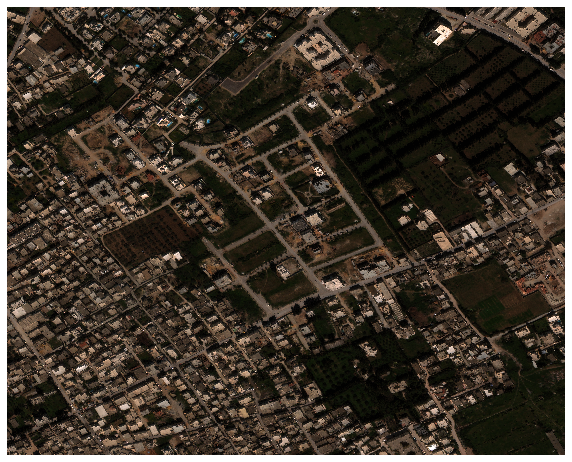

In [1]:
import aug_util as aug
import wv_util as wv
import matplotlib.pyplot as plt
import numpy as np
import csv
%matplotlib inline

fdir = '/data/zjc4/'
#Load an image
cdir = "/data/zjc4/train_images/"

#Load an image
chip_name = '104.tif'
arr = wv.get_image(cdir+chip_name)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(arr)

In [2]:
#Loading our labels
coords1, chips1, classes1 = wv.get_labels(fdir+'xView_train.geojson')

100%|██████████| 601937/601937 [00:04<00:00, 145781.46it/s]


In [5]:
#We only want to coordinates and classes that are within our chip
coords = coords1[chips1==chip_name]
classes = classes1[chips1==chip_name].astype(np.int64)

In [12]:
print(classes)

[73 73 73 ... 18 18 18]


In [6]:
#Load the class number -> class string label map
labels = {}
with open('xview_class_labels.txt') as f:
    for row in csv.reader(f):
        labels[int(row[0].split(":")[0])] = row[0].split(":")[1]

In [7]:

#We can find which classes are present in this image
print([labels[i] for i in np.unique(classes)])

['Small Car', 'Bus', 'Truck', 'Cargo Truck', 'Trailer', 'Scraper/Tractor', 'Shed', 'Building', 'Damaged Building']


In [8]:
c_img, c_box, c_cls = wv.chip_image(img = arr, coords= coords, classes=classes, shape=(500,500))
print("Num Chips: %d" % c_img.shape[0])

Num Chips: 30


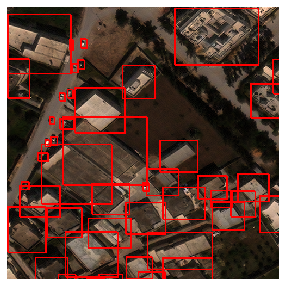

In [10]:
ind = 0
labelled = aug.draw_bboxes(c_img[ind],c_box[ind])
plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(labelled)